[1 1 2 1 1 3 2 2 2 3 2 3 0 2 0 2 0 1 0 3 1 0 1 0 0 1 0 2 0 1 0 1 1 0 0 0 2
 1 3 3 0 1 0 0 3 2 1 0 2 0 0 0 2 1 3 1 1 2 2 1 2 3 1 2 1 1 0 1 1 1 1 0 0 3
 2 1 2 0 1 3 0 0 2 0 1 1 0 2 1 0 0 2 1 0 3 2 3 1 0 3 1 1 0 3 2 3 0 0 1 1 1
 0 1 0 0 1 1 1 1 3 0 1 2 0 3 1 0 1 2 1 3 2 1 1 1 0 1 0 0 1 1 0 2 0 1 3 2 2
 2 2 0 0 2 0 3 0 0 1 1 0 1 3 3 0 0 1 2 2 0 2 0 3 0 1 2 3 2 1 1 0 2 0 0 2 0
 0 0 1 3 1 3 1 0 0 3 0 0 0 1 1 1 3 1 1 1 3 1 3 3 0 0 3 3 0 0 1 3 1 3 0 1 1
 2 0 0 2 1 3 3 2 1 0 0 1 1 0 0 0 1 2 3 1 0 2 2 2 1 0 3 0 0 2 3 0 3 0 0 1 1
 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 2 1 0 2 1 0 3 0 1 3 1 2 0 2 2 1 3 3 0 2 1 1
 1 0 3 3]
[2 0]
[[ 4.19464369  4.00863376]
 [-3.99580912 -1.97910593]
 [ 3.1221012  -2.43355014]
 [ 4.73351115 -1.72590214]]
(4, 2)


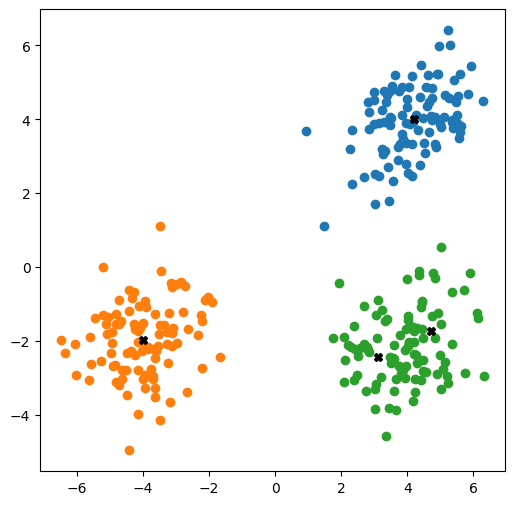

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed (seed=202)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


def two_dim_gaussian (mean, cov, n):
    return np.random.multivariate_normal(mean, cov, n)



def get_data ():
    C1 = two_dim_gaussian ((4.0,4.0), [[1,0.25],[0.25,1.0]], 100)
    C2 = two_dim_gaussian ((-4.0,-2.0), [[1,0.25],[0.25,1.0]], 100)
    C3 = two_dim_gaussian ((4.0,-2.0), [[1,0.25],[0.25,1.0]], 100)

    X = np.concatenate((C1, C2, C3), axis=0)
    # randomize 

    rx = np.random.random ([X.shape[0]])
    ix = np.argsort (rx)
    XX = np.zeros ([X.shape[0], X.shape[1]])
    for i in range (0, X.shape[0]):
        for j in range (0, X.shape[1]):
            XX[i,j] =  X[ix[i],j] 
    return XX

if __name__ == "__main__":   

    X = get_data () 
    df = pd.DataFrame(X, columns=['x','y'])
     
    kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(X)
    print(kmeans.labels_)

    print(kmeans.predict([[0, 0], [12, 3]]))
    print(kmeans.cluster_centers_)
    C = kmeans.cluster_centers_
    print(C.shape)
         
    fig, axs = plt.subplots (1,1,figsize=(6,6))
    axs.scatter (C1[:,0],C1[:,1])
    axs.scatter (C2[:,0],C2[:,1])
    axs.scatter (C3[:,0],C3[:,1])
    axs.plot(C[:,0],C[:,1],'kX')
    plt.show()



For n_clusters = 2 The average silhouette_score is : 0.6384400263467293
For n_clusters = 3 The average silhouette_score is : 0.7159316633538517
For n_clusters = 4 The average silhouette_score is : 0.6048999096867895
For n_clusters = 5 The average silhouette_score is : 0.4686262744424062
For n_clusters = 6 The average silhouette_score is : 0.37715442813331546


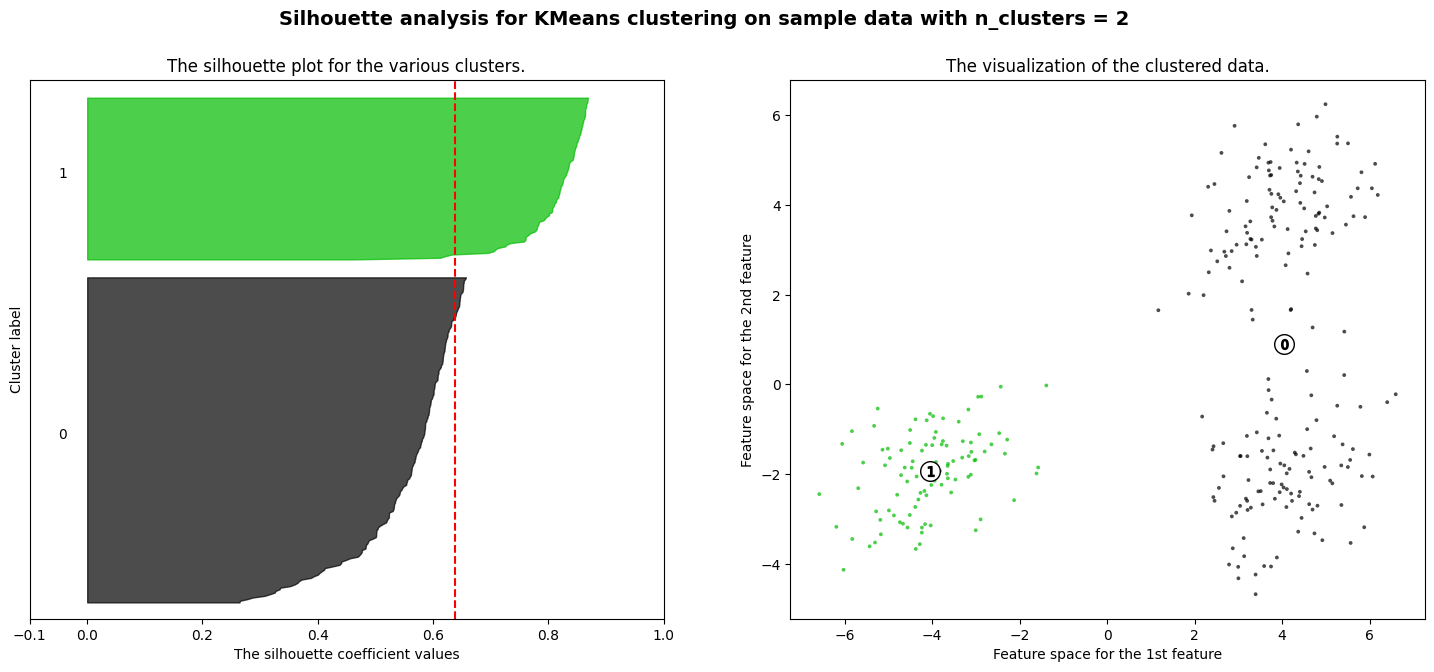

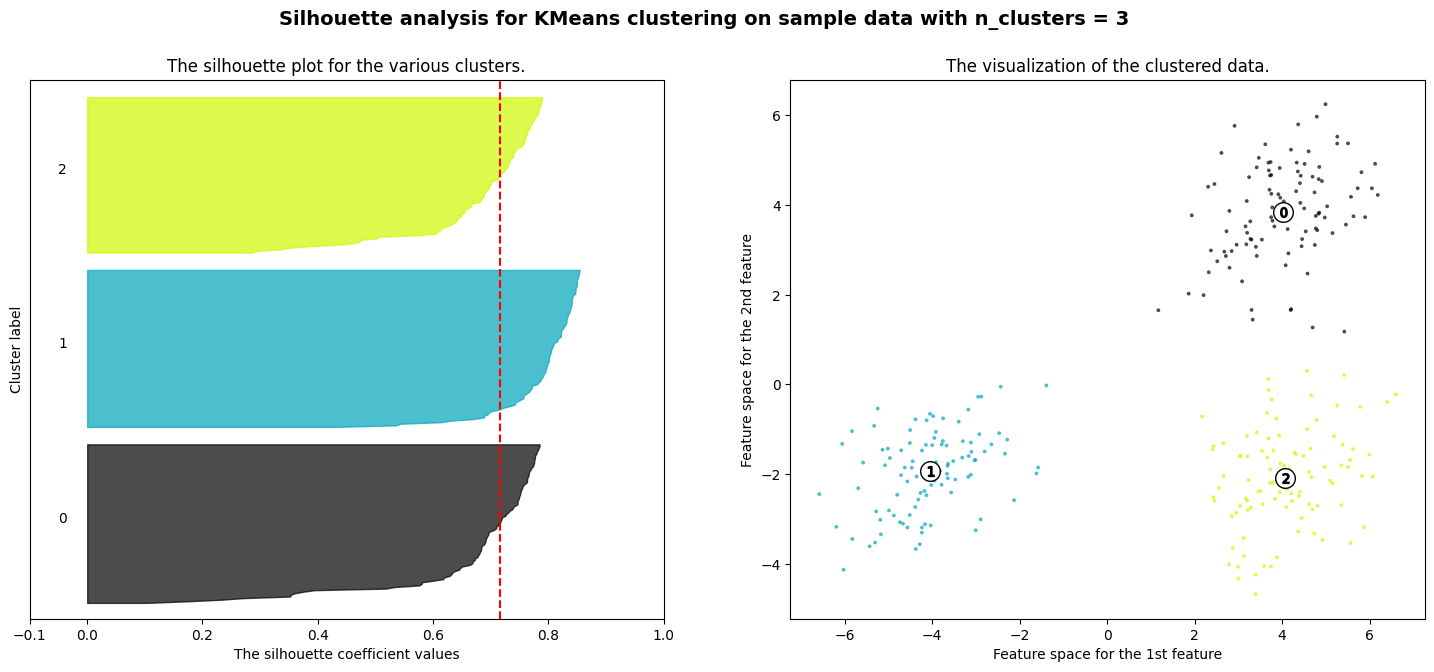

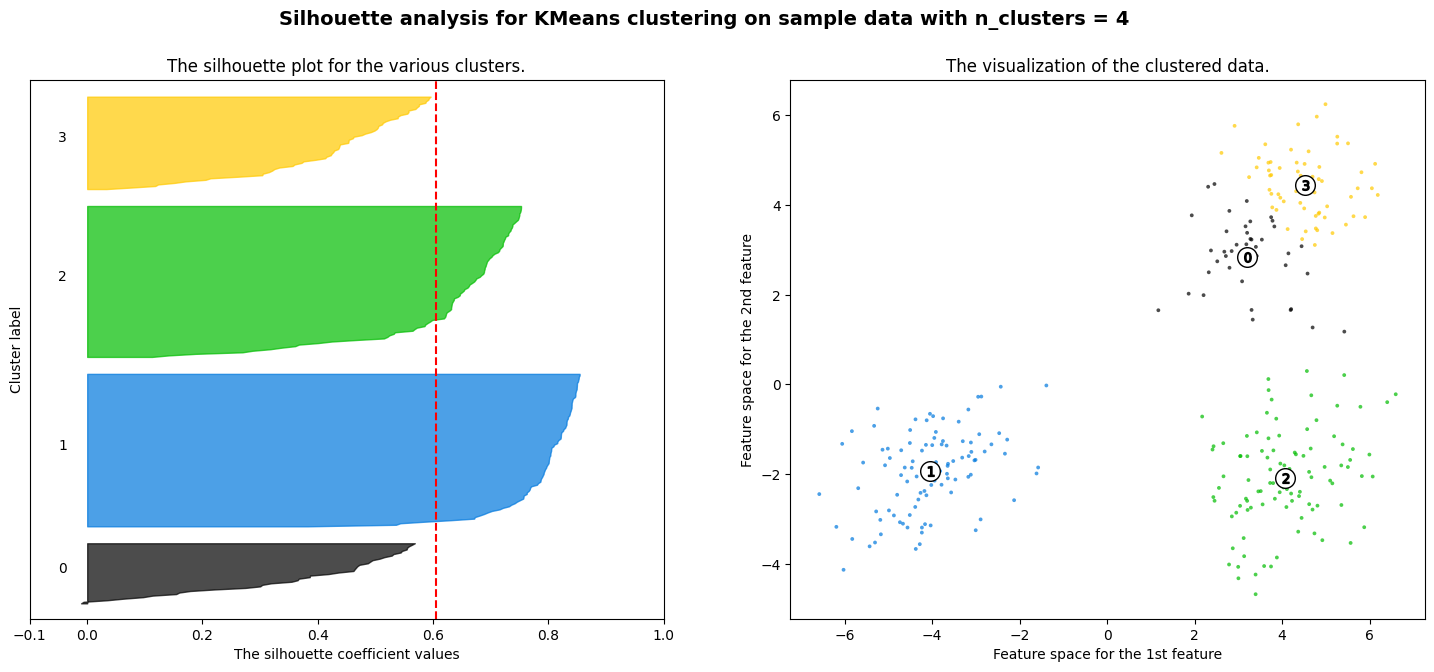

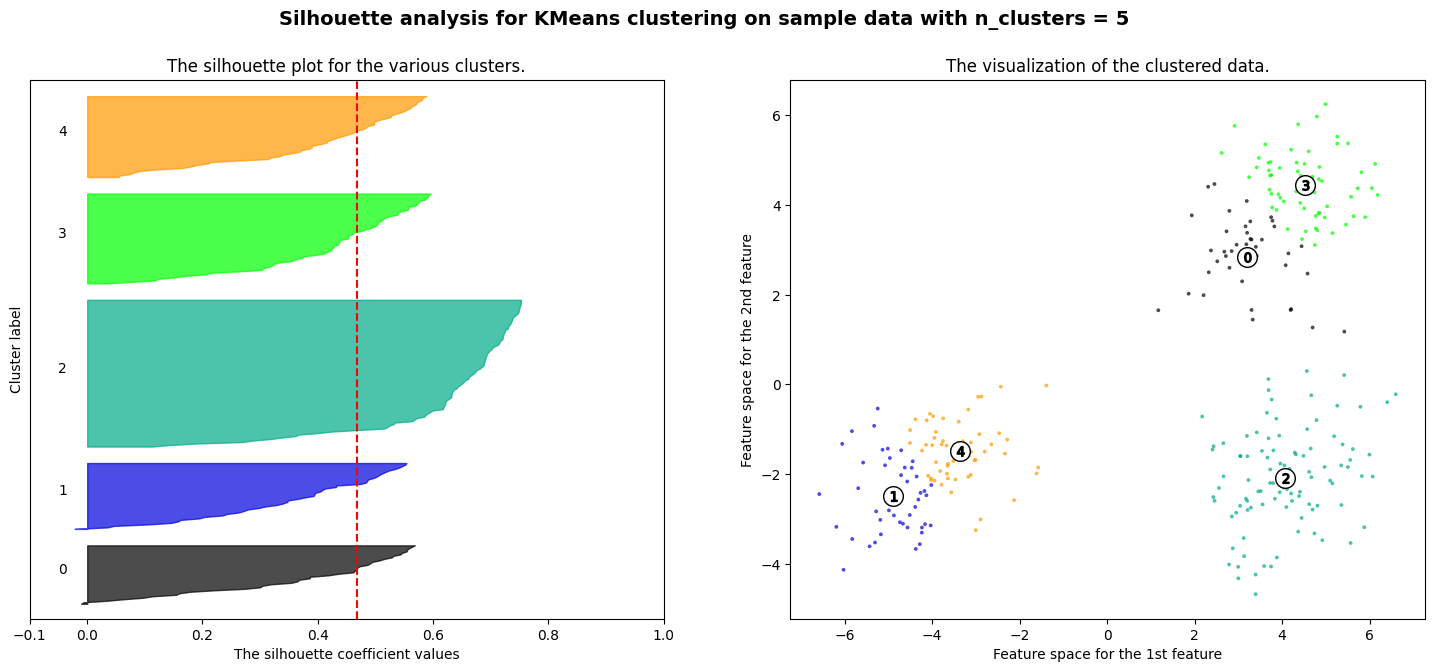

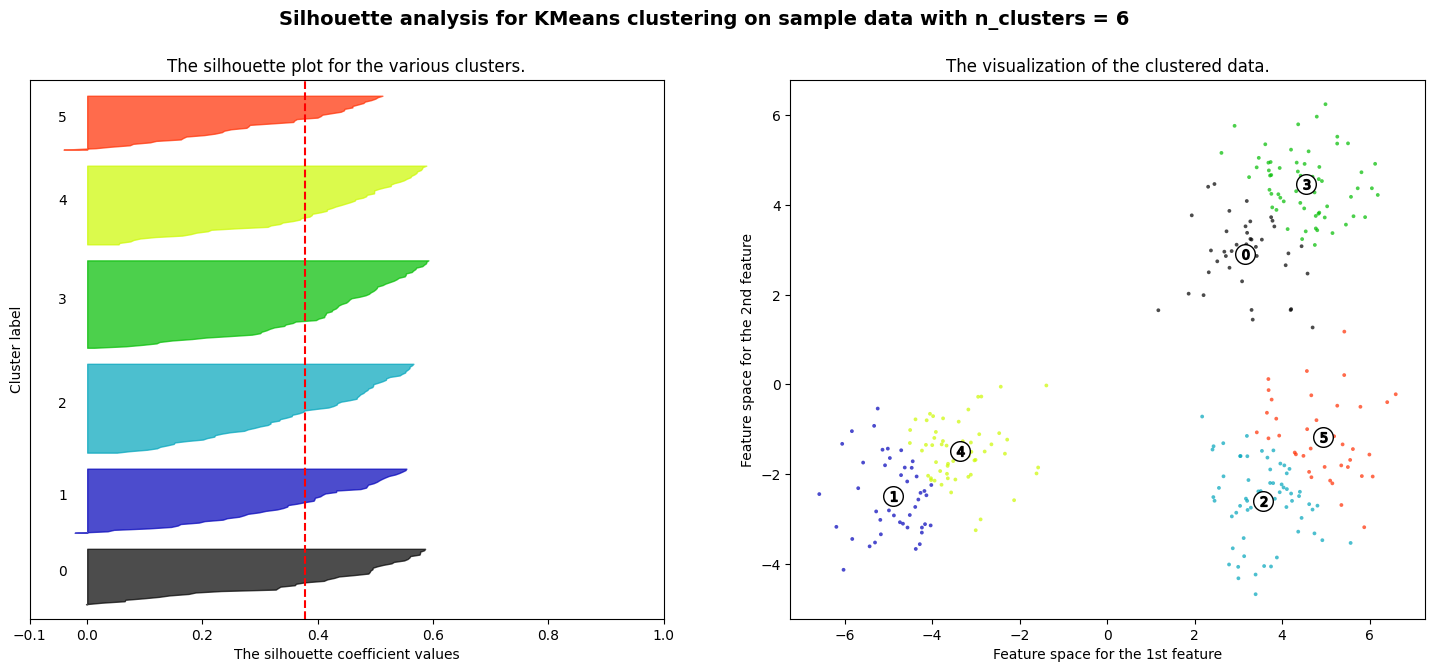

In [38]:

X = get_data() 
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

C:\Users\jayanti.prasad\Anaconda3\envs\aiml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jayanti.prasad\Anaconda3\envs\aiml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jayanti.prasad\Anaconda3\envs\aiml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jayanti.prasad\Anaconda3\envs\aiml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureW

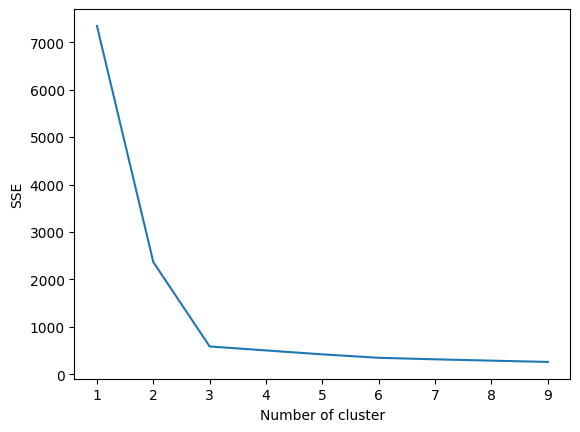

In [41]:
X = get_data()
data = pd.DataFrame(X, columns=['x','y'])

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()